# Include Packages and Common variables

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Label mapping for Y 
img_label_mapping = {0: 'buildings', 1: 'forest', 2: 'glacier', 3: 'mountain', 4: 'sea', 5: 'street'}

# Load data

In [5]:
data_path    = "C:/Users/rachmaa1/Documents/Arif/GT/Deep Learning/Project/data/intel_image/processed_data/" 

In [1]:
def get_data (type='training'):
    _df_X = pd.read_parquet(data_path + type + '_X.parquet')
    _df_X['X'] = _df_X['X_flat'].apply(lambda x: x.reshape(100, 100, 3))
    if type != 'pred':
        _df_Y = pd.read_parquet(data_path + type + '_Y.parquet')
        return pd.DataFrame({'X': _df_X['X'], 'Y': _df_Y['Y']})
    else:
        return pd.DataFrame({'X': _df_X['X']})

In [7]:
df_train = get_data('training')
df_test  = get_data('testing')
df_pred  = get_data('pred')

In [17]:
print (df_train.info())
print ('\n')
print (df_test.info())
print ('\n')
print (df_pred.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14034 entries, 0 to 14033
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       14034 non-null  object
 1   Y       14034 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 219.4+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       3000 non-null   object
 1   Y       3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7301 entries, 0 to 7300
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       7301 non-null   object
dtypes: object(1)
memory usage: 57.2+ KB
None


In [23]:
def print_random_15_images (df_image, df_Y, title='Intel Images'):
    n = 15
    nrow = 3 
    ncol = int (n/nrow)
    fig, ax = plt.subplots (nrows=nrow, ncols=ncol, figsize=(20,10))
    fig.suptitle(title)
    for i in range(n):
        idx = np.random.randint(0, len(df_image))

        _row = i//ncol
        _col = i%ncol
        ax[_row,_col].imshow(df_image[idx])
        ax[_row,_col].set_title(img_label_mapping[df_Y[idx]])
        ax[_row,_col].axis('off')   

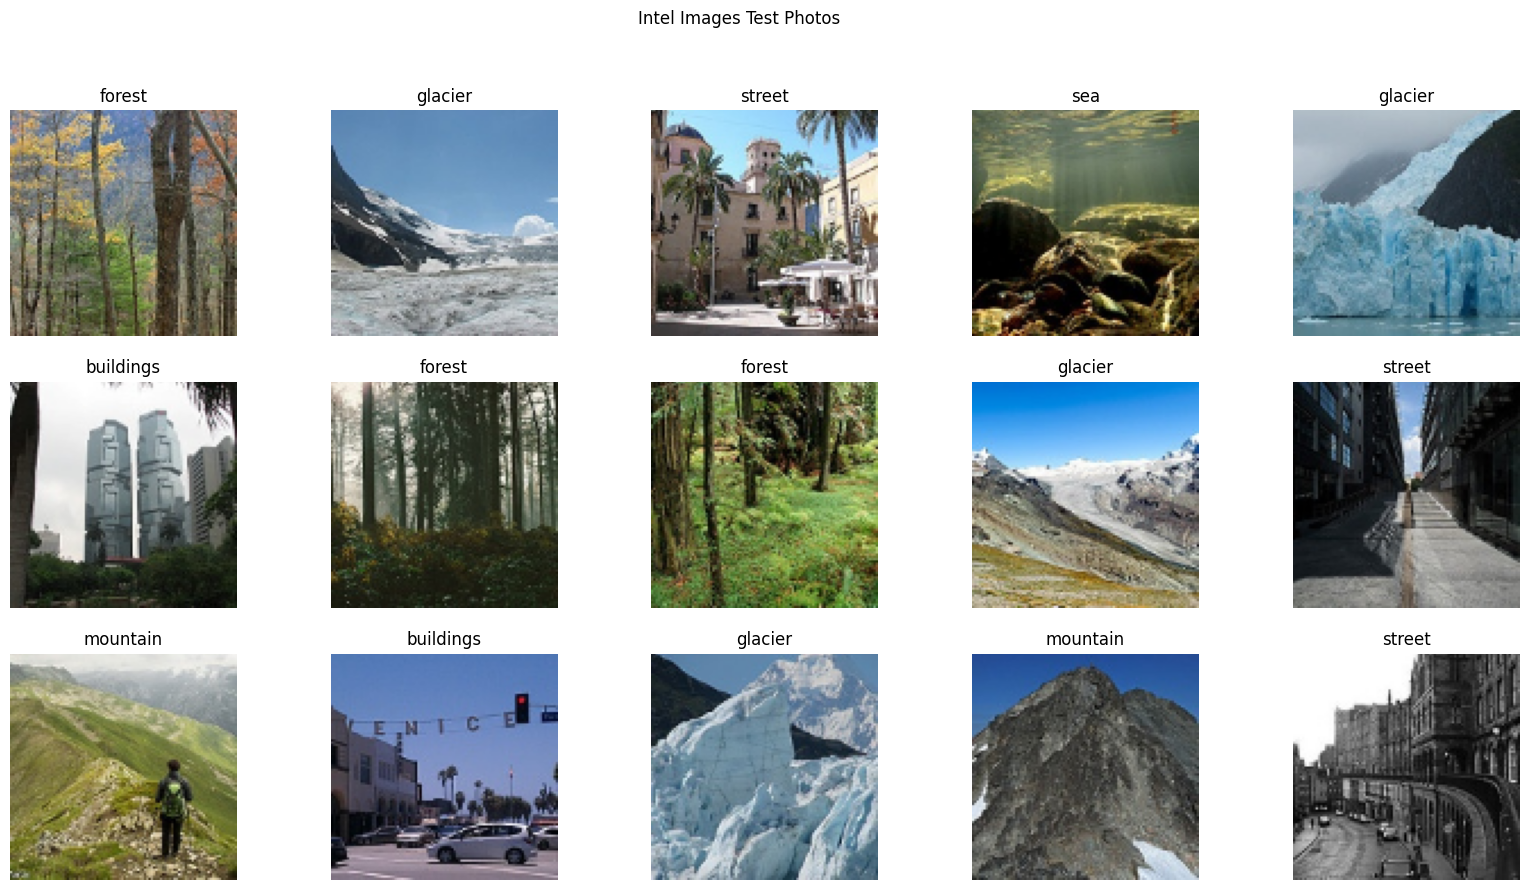

In [24]:
print_random_15_images (df_test['X'], df_test['Y'], 'Intel Images Test Photos')